In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


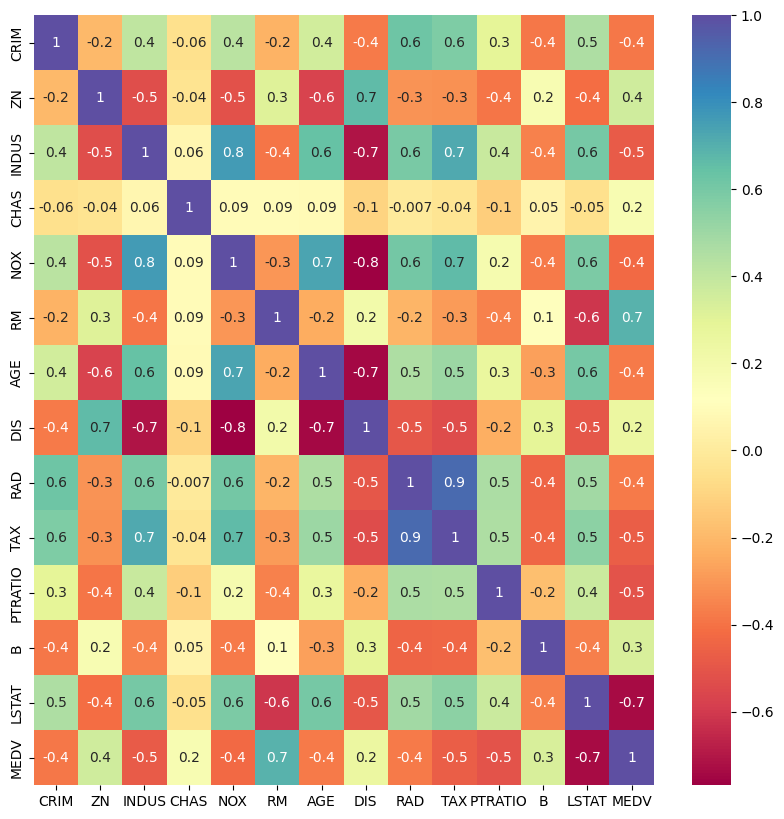

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt="0.1g", cmap='Spectral')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaler.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
cv_predictions = model.predict(X_test_scaled)
cv_mse = mean_squared_error(y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 24.2911


In [10]:
r2 = r2_score(y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6688


In [11]:
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': cv_predictions
})

results_df.head(10)

,Actual Values,Predicted Values
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
5,20.0,23.254429
6,17.8,17.662538
7,14.0,14.341190
8,19.6,23.013207
9,16.8,20.632456


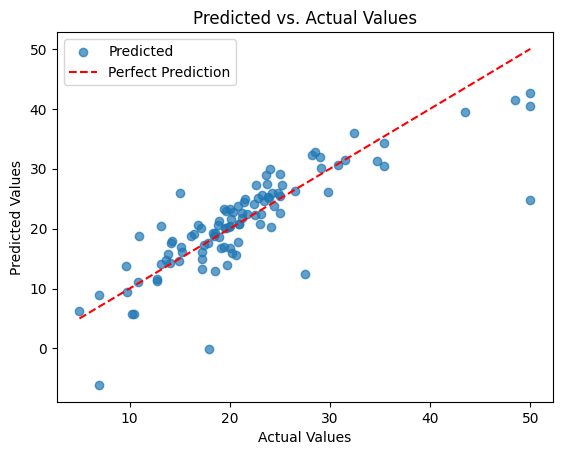

In [12]:
plt.scatter(y_test, cv_predictions, alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df_scaler.drop(['MEDV'], axis = 1) # our predictor variables
y = df_scaler['MEDV'] # our target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_head = lr.predict(X_test)
from sklearn.metrics import r2_score
print("R-squared-score:", r2_score(y_test, y_head))

R-squared-score: 0.6687594935356322


In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_head2 = tree_reg.predict(X_test)
print("Rsquared_score:", r2_score(y_test, y_head2))

Rsquared_score: 0.841176107916293


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 75, random_state= 42)
rf.fit(X_train, y_train)
y_head3 = rf.predict(X_test)
print("r2_score:", r2_score(y_test, y_head3))

r2_score: 0.8891842966186413


In [19]:
X2 = df_scaler.drop(['MEDV', 'TAX'], axis = 1) # our predictor variables withput TAX
y2 = df_scaler['MEDV'] # our target variables

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
rf2 = RandomForestRegressor(n_estimators= 75, random_state= 42)
rf2.fit(X2_train, y2_train)
y_predict3 = rf2.predict(X2_test)
print("Rsquared_score:", r2_score(y2_test, y_predict3))

r2_score: 0.8954745042614556


In [23]:
from sklearn import metrics
y_test_prd=lr.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test,y_test_prd))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_prd)))
print('R_squred:',metrics.r2_score(y_test,y_test_prd))

MAE: 0.3470927251421173
RMSE: 0.5364166292540398
R_squred: 0.6687594935356322


In [24]:
new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 29.95


In [26]:
#The Random Forest have got the best value of R square hence the Random Forest has the best model 
#because it understood the data more clearly than other models
